In [72]:
from logs import log 

logger = log(path="Log_File/", file="Model_Training.logs")

In [73]:
# Importing libraries for statistical analysis 
from statistics import mean
import scipy.stats as stats
from scipy.stats import randint
from datetime import datetime



# Importing libraries for model training and evaluation

import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance 
from lightgbm import LGBMClassifier


# for utilies 

from sklearn.pipeline import Pipeline
from sklearn.utils import resample

# train test split and cross-validation
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score

# preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler,RobustScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer


# For checking imbalance data 
from collections import Counter

# for balancing an imbalance data 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# model validation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ,precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
    
# model fine tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# for model saving 
import pickle 



import warnings
warnings.filterwarnings("ignore")

logger.info("Imported Required libraries Successfully..!!")


INFO Imported Required libraries Successfully..!!


In [74]:
df_train = pd.read_csv("data\processed\Credit_Processed_Train.csv")

logger.info("Imported training data sucessfully..!!")

INFO Imported training data sucessfully..!!


In [75]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   status               800 non-null    int64  
 1   purpose              800 non-null    int64  
 2   credit_history       800 non-null    int64  
 3   foreign_worker       800 non-null    int64  
 4   employment_duration  800 non-null    int64  
 5   other_debtors        800 non-null    int64  
 6   personal_status_sex  800 non-null    int64  
 7   credit_risk          800 non-null    int64  
 8   savings              800 non-null    int64  
 9   property             800 non-null    int64  
 10  log_amount           800 non-null    float64
 11  log_age              800 non-null    float64
 12  log_duration         800 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 81.4 KB


In [76]:
df_test = pd.read_csv("data\processed\German_credit_Processed_Test.csv")

In [77]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   status               200 non-null    int64  
 1   purpose              200 non-null    int64  
 2   credit_history       200 non-null    int64  
 3   foreign_worker       200 non-null    int64  
 4   employment_duration  200 non-null    int64  
 5   other_debtors        200 non-null    int64  
 6   personal_status_sex  200 non-null    int64  
 7   savings              200 non-null    int64  
 8   property             200 non-null    int64  
 9   log_amount           200 non-null    float64
 10  log_age              200 non-null    float64
 11  log_duration         200 non-null    float64
dtypes: float64(3), int64(9)
memory usage: 18.9 KB


In [78]:
X_final = df_train.drop('credit_risk',axis=1)
y_final = df_train['credit_risk']

In [79]:
X_final.head()

,status,purpose,credit_history,foreign_worker,employment_duration,other_debtors,personal_status_sex,savings,property,log_amount,log_age,log_duration
0,1,2,4,2,2,1,2,1,2,6.96,3.04,2.89
1,1,0,4,2,3,1,3,1,1,7.94,3.58,2.20
2,2,9,2,2,4,1,2,2,1,6.73,3.14,2.48
3,1,0,4,1,3,1,3,1,1,7.66,3.66,2.48
4,1,0,4,1,2,1,3,1,1,7.71,3.87,2.30


In [80]:
X_final.columns

Index(['status', 'purpose', 'credit_history', 'foreign_worker',
       'employment_duration', 'other_debtors', 'personal_status_sex',
       'savings', 'property', 'log_amount', 'log_age', 'log_duration'],
      dtype='object')

In [81]:
y_final.head()

0    1
1    1
2    1
3    1
4    1
Name: credit_risk, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

logger.info("Splitting of dataset for train and test is done..!!")

INFO Splitting of dataset for train and test is done..!!


In [83]:
X_train.head()

,status,purpose,credit_history,foreign_worker,employment_duration,other_debtors,personal_status_sex,savings,property,log_amount,log_age,log_duration
264,4,1,2,2,5,1,3,5,4,7.17,3.81,2.71
615,1,2,2,2,3,1,3,1,3,8.30,3.30,3.18
329,1,1,2,2,5,1,2,5,1,7.94,3.26,3.18
342,4,1,2,2,3,1,3,1,3,8.45,3.40,2.71
394,2,1,2,2,3,1,3,5,3,7.61,3.40,2.48


In [84]:
y_train.head()

264    1
615    1
329    1
342    1
394    1
Name: credit_risk, dtype: int64

In [85]:
#Scaling 

scaler=StandardScaler()

In [86]:
X_train = scaler.fit_transform(X_train)

logger.info("train scaling done..!!")

INFO train scaling done..!!


In [87]:
X_test =scaler.transform(X_test)

logger.info("test data transform done...!!")

INFO test data transform done...!!


In [88]:
import pickle 

with open("saved_models/scaling.pkl", "wb") as f:
    pickle.dump(scaler, f)

logger.info("Scaling.pkl file saved successfully...!!")

INFO Scaling.pkl file saved successfully...!!


In [89]:
# try various models and pick the best one for further tuning 
def cross_validate(X = X_train,y = y_train):
    
    warnings.filterwarnings(action='ignore',message='')

    models = []
    models.append(('RF',RandomForestClassifier()))
    models.append(('GB',GradientBoostingClassifier()))
    models.append(('SVC',SVC()))
    models.append(('SGD',SGDClassifier()))
    models.append(('CBC',CatBoostClassifier()))
    models.append(('KNN',KNeighborsClassifier()))
    models.append(('LogReg',LogisticRegression()))
    models.append(('AdaBoost',AdaBoostClassifier()))
    models.append(('Bag',BaggingClassifier()))
    models.append(('xgboost',XGBClassifier()))
    models.append(('lightgbm',LGBMClassifier()))
    models.append(('Dtree',DecisionTreeClassifier()))
    
    
    results = []
    names = []
    scoring ='accuracy'

    for name,model in models:
        #kfold = KFold(n_splits=10,random_state=42)
        kfold = RepeatedStratifiedKFold(n_splits=10,random_state=42,n_repeats=3)
        cv_results = cross_val_score(model,X,y,cv=kfold,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print (f'Model:{name},Mean: {cv_results.mean()},Std Dev: {cv_results.std()}')

In [90]:
cross_validate(X_train,y_train)

Model:RF,Mean: 0.7817708333333333,Std Dev: 0.03686160891504269
Model:GB,Mean: 0.7708333333333334,Std Dev: 0.03454817489953541
Model:SVC,Mean: 0.7692708333333333,Std Dev: 0.03168533577969818
Model:SGD,Mean: 0.7322916666666667,Std Dev: 0.04187448175467037
Learning rate set to 0.00814
0:	learn: 0.6891699	total: 5.11ms	remaining: 5.11s
1:	learn: 0.6848255	total: 9.88ms	remaining: 4.93s
2:	learn: 0.6804130	total: 14.8ms	remaining: 4.92s
3:	learn: 0.6771681	total: 19ms	remaining: 4.72s
4:	learn: 0.6727386	total: 22.6ms	remaining: 4.49s
5:	learn: 0.6681605	total: 27.1ms	remaining: 4.49s
6:	learn: 0.6639502	total: 31ms	remaining: 4.39s
7:	learn: 0.6592329	total: 34.6ms	remaining: 4.29s
8:	learn: 0.6551461	total: 38.1ms	remaining: 4.2s
9:	learn: 0.6508817	total: 42.7ms	remaining: 4.23s
10:	learn: 0.6473237	total: 46.1ms	remaining: 4.15s
11:	learn: 0.6432700	total: 49.8ms	remaining: 4.1s
12:	learn: 0.6390442	total: 53.3ms	remaining: 4.04s
13:	learn: 0.6350261	total: 57.2ms	remaining: 4.03s
14:	l

In [91]:
Counter(y_train)

Counter({1: 485, 0: 155})

In [92]:
# Sampling an imbalance dataset through ADASYN & Let's see the difference 
ada = ADASYN(sampling_strategy='minority',random_state=42,n_neighbors=7)
X_res,y_res = ada.fit_resample(X_train,y_train)
Counter(y_res)

Counter({0: 495, 1: 485})

In [93]:
cross_validate(X_res,y_res)

Model:RF,Mean: 0.8666666666666667,Std Dev: 0.03268847286186112
Model:GB,Mean: 0.8357142857142859,Std Dev: 0.03357023962495685
Model:SVC,Mean: 0.7622448979591837,Std Dev: 0.0382845756470224
Model:SGD,Mean: 0.6517006802721088,Std Dev: 0.061322672597207806
Learning rate set to 0.009764
0:	learn: 0.6895286	total: 7.63ms	remaining: 7.62s
1:	learn: 0.6862079	total: 13.2ms	remaining: 6.6s
2:	learn: 0.6831267	total: 18.1ms	remaining: 6.03s
3:	learn: 0.6798732	total: 24ms	remaining: 5.97s
4:	learn: 0.6765888	total: 29.2ms	remaining: 5.8s
5:	learn: 0.6737568	total: 34.2ms	remaining: 5.67s
6:	learn: 0.6702683	total: 39.6ms	remaining: 5.62s
7:	learn: 0.6663465	total: 44.9ms	remaining: 5.57s
8:	learn: 0.6627583	total: 49.7ms	remaining: 5.47s
9:	learn: 0.6598736	total: 54.9ms	remaining: 5.44s
10:	learn: 0.6568689	total: 60.7ms	remaining: 5.45s
11:	learn: 0.6538924	total: 65.9ms	remaining: 5.42s
12:	learn: 0.6502442	total: 71.2ms	remaining: 5.41s
13:	learn: 0.6472856	total: 76.2ms	remaining: 5.37s
14

In [94]:
from datetime import datetime 
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
     

In [95]:
# Hyper-parameter Tuning 

param_grid = [{'n_estimators': [3, 10, 30], 'max_depth': [2, 4, 6, 8],'booster': ['gbtree','dart'],
              'learning_rate':[0.3,0.5,0.01,0.1]}]

In [96]:
# For XGB classifier 
xgb_clf = XGBClassifier(random_state=42)

grid_search = GridSearchCV(xgb_clf, param_grid=param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_res,y_res)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid=[{'booster': ['gbtree', 'dart'],
                          'learning_rate': [0.3, 0.5, 0.01, 0.1],
                          'max_depth': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='accuracy')

In [97]:
grid_search.best_params_

{'booster': 'gbtree', 'learning_rate': 0.5, 'max_depth': 8, 'n_estimators': 30}

In [98]:
# For RF classifier 

param_distribs = {
        'n_estimators': randint(low=1, high=500),
        'max_depth': randint(low=1, high=10),
        'max_features':randint(low=1,high=10),
        
    }

rf_clf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(rf_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(X_res,y_res)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024B4B210790>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024B4A97AE50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024B4B212850>},
                   random_state=42, scoring='accuracy')

In [99]:
rnd_search.best_params_

{'max_depth': 8, 'max_features': 6, 'n_estimators': 386}

In [100]:
# hyper parameters selcted based on grid search 
rf_clf = RandomForestClassifier(random_state=42,max_depth=8,max_features=6,n_estimators=386)
xgb_clf =  XGBClassifier(n_estimators=30,max_depth=8,random_state=42,learning_rate=0.3,
                        booster='gbtree')

# with default paramters
svc_clf = SVC(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
bag_clf = BaggingClassifier(random_state=42,base_estimator=XGBClassifier())

In [101]:
# Fitting the model
start_time = timer(None)
xgb_clf.fit(X_res,y_res)
timer(start_time)


 Time taken: 0 hours 0 minutes and 0.11 seconds.


In [102]:
# Fitting the model
start_time = timer(None)
rf_clf.fit(X_res,y_res)
timer(start_time)


 Time taken: 0 hours 0 minutes and 2.38 seconds.


In [103]:
# Fitting the model
start_time = timer(None)
svc_clf.fit(X_res,y_res)
timer(start_time)


 Time taken: 0 hours 0 minutes and 0.12 seconds.


In [104]:
# Fitting the model
start_time = timer(None)
gb_clf.fit(X_res,y_res)
timer(start_time)


 Time taken: 0 hours 0 minutes and 0.54 seconds.


In [105]:
# Fitting the model
start_time = timer(None)
bag_clf.fit(X_res,y_res)
timer(start_time)


 Time taken: 0 hours 0 minutes and 2.34 seconds.


In [106]:
# Predicting 

predictions_train_xgb = xgb_clf.predict(X_test)

In [107]:
predictions_train_rf = rf_clf.predict(X_test)

In [108]:
predictions_train_svc = svc_clf.predict(X_test)

In [109]:
predictions_train_gb = gb_clf.predict(X_test)

In [110]:
predictions_train_bag = bag_clf.predict(X_test)

In [111]:
print('Accuracy XGBoost...{}'.format(accuracy_score(y_test,predictions_train_xgb)))
print('Accuracy RForest...{}'.format(accuracy_score(y_test,predictions_train_rf)))
print('Accuracy SupportVector...{}'.format(accuracy_score(y_test,predictions_train_svc)))
print('Accuracy GBoost...{}'.format(accuracy_score(y_test,predictions_train_gb)))
print('Accuracy Bagging...{}'.format(accuracy_score(y_test,predictions_train_bag)))

Accuracy XGBoost...0.75
Accuracy RForest...0.73125
Accuracy SupportVector...0.775
Accuracy GBoost...0.74375
Accuracy Bagging...0.7375


In [112]:
print('Precision XGBoost...{}'.format(precision_score(y_test,predictions_train_xgb)))
print('Precision RForest...{}'.format(precision_score(y_test,predictions_train_rf)))
print('Precision SupportVector...{}'.format(precision_score(y_test,predictions_train_svc)))
print('Precision GBoost...{}'.format(precision_score(y_test,predictions_train_gb)))
print('Precision Bagging...{}'.format(precision_score(y_test,predictions_train_bag)))

Precision XGBoost...0.8048780487804879
Precision RForest...0.8333333333333334
Precision SupportVector...0.8761904761904762
Precision GBoost...0.8245614035087719
Precision Bagging...0.8067226890756303


In [113]:
print('Recall XGBoost...{}'.format(recall_score(y_test,predictions_train_xgb)))
print('Recall RForest...{}'.format(recall_score(y_test,predictions_train_rf)))
print('Recall SupportVector...{}'.format(recall_score(y_test,predictions_train_svc)))
print('Recall GBoost...{}'.format(recall_score(y_test,predictions_train_gb)))
print('Recall Bagging...{}'.format(recall_score(y_test,predictions_train_bag)))

Recall XGBoost...0.8608695652173913
Recall RForest...0.782608695652174
Recall SupportVector...0.8
Recall GBoost...0.8173913043478261
Recall Bagging...0.8347826086956521


In [114]:
print('F1 XGBoost...{}'.format(f1_score(y_test,predictions_train_xgb)))
print('F1 RForest...{}'.format(f1_score(y_test,predictions_train_rf)))
print('F1 SupportVector...{}'.format(f1_score(y_test,predictions_train_svc)))
print('F1 GBoost...{}'.format(f1_score(y_test,predictions_train_gb)))
print('F1 Bagging...{}'.format(f1_score(y_test,predictions_train_bag)))

F1 XGBoost...0.8319327731092437
F1 RForest...0.8071748878923767
F1 SupportVector...0.8363636363636364
F1 GBoost...0.8209606986899564
F1 Bagging...0.8205128205128206


In [115]:
print('roc_auc_score XGBoost...{}'.format(roc_auc_score(y_test,predictions_train_xgb)))
print('roc_auc_score RForest...{}'.format(roc_auc_score(y_test,predictions_train_rf)))
print('roc_auc_score SupportVector...{}'.format(roc_auc_score(y_test,predictions_train_svc)))
print('roc_auc_score SupportVector...{}'.format(roc_auc_score(y_test,predictions_train_svc)))
print('roc_auc_score GBoost...{}'.format(roc_auc_score(y_test,predictions_train_gb)))
print('roc_auc_score Bagging...{}'.format(roc_auc_score(y_test,predictions_train_bag)))

roc_auc_score XGBoost...0.663768115942029
roc_auc_score RForest...0.6913043478260869
roc_auc_score SupportVector...0.7555555555555555
roc_auc_score SupportVector...0.7555555555555555
roc_auc_score GBoost...0.6864734299516908
roc_auc_score Bagging...0.6618357487922706


In [116]:
print('XGBoost_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_xgb))
print('RandomForest_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_rf))
print('SupportVector_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_svc))
print('GradientBoosting_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_gb))
print('Bagging_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_bag))

XGBoost_Confusion Matrix
[[21 24]
 [16 99]]
RandomForest_Confusion Matrix
[[27 18]
 [25 90]]
SupportVector_Confusion Matrix
[[32 13]
 [23 92]]
GradientBoosting_Confusion Matrix
[[25 20]
 [21 94]]
Bagging_Confusion Matrix
[[22 23]
 [19 96]]


In [117]:
f1 =cross_val_score(xgb_clf, X_res,y_res, cv=5, scoring='f1')
print('\nFinal F1 score of the model:', round(f1.mean(),2))


Final F1 score of the model: 0.84


In [118]:
with open("saved_models/xgb.pkl", "wb") as f:
    pickle.dump(xgb_clf, f)

##### Train the models on entire training set (Oversample) and then predict the submission on test set 

In [119]:
df_train_oversample = pd.DataFrame(X_res, columns = ['status', 'purpose', 'credit_history', 'foreign_worker',
       'employment_duration', 'other_debtors', 'personal_status_sex',
       'savings', 'property', 'log_amount', 'log_age', 'log_duration'])

df_train_oversample.head()

,status,purpose,credit_history,foreign_worker,employment_duration,other_debtors,personal_status_sex,savings,property,log_amount,log_age,log_duration
0,1.071559,-0.667203,-0.538587,0.225617,1.352887,-0.31774,0.461290,1.769706,1.577949,-0.800460,0.959801,-0.253277
1,-1.329133,-0.298455,-0.538587,0.225617,-0.293211,-0.31774,0.461290,-0.737459,0.632362,0.680463,-0.762743,0.546741
2,-1.329133,-0.667203,-0.538587,0.225617,1.352887,-0.31774,-0.951273,1.769706,-1.258813,0.208664,-0.897844,0.546741
3,1.071559,-0.667203,-0.538587,0.225617,-0.293211,-0.31774,0.461290,-0.737459,0.632362,0.877045,-0.424989,-0.253277
4,-0.528902,-0.667203,-0.538587,0.225617,-0.293211,-0.31774,0.461290,1.769706,0.632362,-0.223818,-0.424989,-0.644776


In [120]:
df_test_oversample = pd.DataFrame(X_test, columns = ['status', 'purpose', 'credit_history', 'foreign_worker',
       'employment_duration', 'other_debtors', 'personal_status_sex',
       'savings', 'property', 'log_amount', 'log_age', 'log_duration'])

df_test_oversample.head()

,status,purpose,credit_history,foreign_worker,employment_duration,other_debtors,personal_status_sex,savings,property,log_amount,log_age,log_duration
0,1.071559,-0.298455,-0.538587,0.225617,-1.116260,-0.31774,-0.951273,-0.737459,-0.313226,0.863940,-0.188562,-1.819271
1,-0.528902,-1.035951,-2.381881,0.225617,-1.116260,-0.31774,-0.951273,-0.737459,-1.258813,-0.394189,-0.897844,-0.253277
2,1.071559,-0.667203,1.304706,0.225617,1.352887,-0.31774,0.461290,-0.737459,0.632362,0.405247,0.182968,0.308438
3,1.071559,0.070293,1.304706,0.225617,1.352887,-0.31774,0.461290,1.142915,0.632362,-0.538350,1.027352,0.053113
4,1.071559,0.070293,1.304706,0.225617,1.352887,-0.31774,0.461290,1.769706,0.632362,0.431458,1.365106,1.227608


In [121]:
df_os_train = pd.concat([df_train_oversample,df_test_oversample],axis=0)
df_os_train.head()

,status,purpose,credit_history,foreign_worker,employment_duration,other_debtors,personal_status_sex,savings,property,log_amount,log_age,log_duration
0,1.071559,-0.667203,-0.538587,0.225617,1.352887,-0.31774,0.461290,1.769706,1.577949,-0.800460,0.959801,-0.253277
1,-1.329133,-0.298455,-0.538587,0.225617,-0.293211,-0.31774,0.461290,-0.737459,0.632362,0.680463,-0.762743,0.546741
2,-1.329133,-0.667203,-0.538587,0.225617,1.352887,-0.31774,-0.951273,1.769706,-1.258813,0.208664,-0.897844,0.546741
3,1.071559,-0.667203,-0.538587,0.225617,-0.293211,-0.31774,0.461290,-0.737459,0.632362,0.877045,-0.424989,-0.253277
4,-0.528902,-0.667203,-0.538587,0.225617,-0.293211,-0.31774,0.461290,1.769706,0.632362,-0.223818,-0.424989,-0.644776


In [122]:
df_os_Y = pd.concat([y_res,y_test],axis=0)
df_os_Y.head()

0    1
1    1
2    1
3    1
4    1
Name: credit_risk, dtype: int64

In [123]:
df_os_train.shape

(1140, 12)

In [124]:
df_os_train.columns

Index(['status', 'purpose', 'credit_history', 'foreign_worker',
       'employment_duration', 'other_debtors', 'personal_status_sex',
       'savings', 'property', 'log_amount', 'log_age', 'log_duration'],
      dtype='object')

In [125]:
df_os_Y.shape

(1140,)

In [126]:
#Scaling 

scaler_os = StandardScaler()

In [127]:
scaler_os.fit(df_os_train)

StandardScaler()

In [128]:
df_os_train = scaler_os.transform(df_os_train)

In [129]:
df_os_test = scaler_os.transform(df_test)

In [130]:
xgb_clf_os = XGBClassifier()

In [131]:
xgb_clf_os.fit(df_os_train, df_os_Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [132]:
y_os_xgb = xgb_clf_os.predict(df_os_test)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

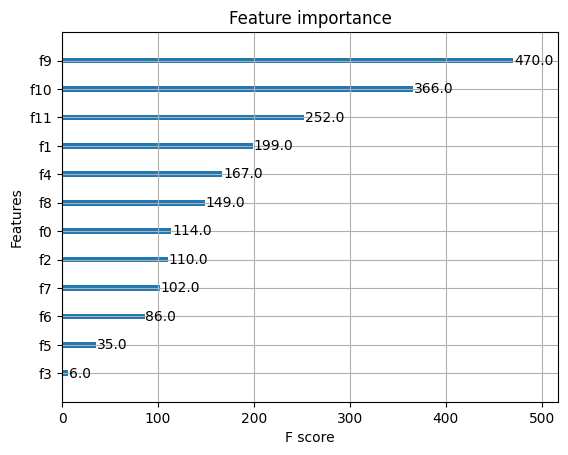

In [133]:
plot_importance(xgb_clf_os.fit(df_os_train, df_os_Y))

In [134]:
f1 =cross_val_score(xgb_clf_os, df_os_train, df_os_Y, cv=5, scoring='f1')
print('\nFinal F1 score of the model:', round(f1.mean(),2))


Final F1 score of the model: 0.84


F1 Score of the model is remain same even train as oversampled. We will choose previos one as our model prediction. 